# 1. Introduction

## 1.1. Project Overview

In this project, I aim to build a classification model to predict customer churn for SyriaTel, a telecommunications company. Customer churn, or the loss of customers to competitors or other factors, represents a significant challenge for businesses in the telecom industry. By predicting which customers are likely to leave SyriaTel, the company can implement targeted retention strategies to reduce churn and improve customer loyalty.


## 1.2. Dataset Choice

For this project, I will use the **SyriaTel Customer Churn** dataset. This dataset provides information about SyriaTel's customers and their interactions with the company. It includes various features that can be used to predict whether a customer will stop doing business with SyriaTel.

You can access the dataset [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download).


### Why This Dataset?

- **Relevance**: The dataset is directly related to the business problem of customer churn, making it highly relevant for our classification task.
- **Binary Classification**: The problem is a binary classification problem, where we need to predict whether a customer will churn (yes) or not (no). This simplifies the modeling and evaluation process.
- **Business Impact**: Reducing customer churn can have a substantial positive impact on SyriaTel's revenue and customer retention efforts.

By analyzing this dataset, I aim to provide actionable insights that can help SyriaTel minimize churn and enhance customer satisfaction.


# 2. Business Understanding

## 2.1. Overview

The telecommunications industry is highly competitive, with companies constantly striving to retain their customers while acquiring new ones. Customer churn, the phenomenon where customers stop doing business with a company, poses a significant challenge. Reducing churn is critical because acquiring new customers often costs more than retaining existing ones.


## 2.2. Problem Statement

SyriaTel, a leading telecommunications company, is facing challenges with customer retention. The company has observed a decline in customer loyalty, leading to increased churn rates. The business needs to identify customers who are likely to churn in order to take proactive measures to retain them.


## 2.3. Objective

The primary objective of this project is to build a machine learning model that can accurately predict whether a SyriaTel customer will churn. By identifying the key factors that contribute to customer churn, the company can implement targeted retention strategies to minimize churn rates and improve customer satisfaction.


## 2.4. Stakeholders

The key stakeholders for this project include:
- **Marketing Team:** Interested in identifying at-risk customers for targeted retention campaigns.
- **Customer Service Team:** Aiming to improve customer satisfaction and reduce churn through personalized service.
- **Business Analysts:** Focused on understanding churn patterns and their impact on the company’s revenue.
- **Executive Team:** Concerned with overall business performance and customer retention strategies.


# 3. Data Understanding

## 3.1. Overview

In this section, I will explore the dataset provided by SyriaTel. Understanding the structure and characteristics of the data is crucial before moving forward with the analysis. I will look into the data types, the presence of missing values, and the distribution of features.


## 3.2. Data Collection

The dataset used in this project was obtained from a curated collection of customer churn datasets. It includes a wide range of features that capture customer behavior, account information, and service usage patterns. This data will be the foundation for building our predictive model.


### Load the Dataset

In [2]:
# Load necessary libraries
import pandas as pd

# Load the dataset
data_path = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 3.3. Data Description
The dataset contains 3,333 rows and 21 columns, representing customer information for SyriaTel, a telecommunications company. Key attributes include:

- **State**: Customer's U.S. state of residence.
- **Account length**: Duration of customer’s relationship with SyriaTel.
- **Area code**: Area code of the customer’s phone number.
- **Phone number**: Customer’s phone number.
- **International plan**: Subscription to an international calling plan (yes or no).
- **Voice mail plan**: Subscription to a voice mail plan (yes or no).
- **Usage and charges**: Includes total minutes, calls, and charges for day, evening, night, and international periods.
- **Customer service calls**: Number of calls made to customer service.
- **Churn**: Whether the customer churned (True) or not (False).

This dataset will be used to identify patterns and predict customer churn.

### Data Insights and Summary Statistics

To further understand the dataset, we will explore the summary statistics and overall data structure:

In [3]:
# Display summary statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# Display data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Unique Values and Data Types

I will now examine the unique values and data types of each column in the dataset. This analysis helps us understand the structure of the data, identify categorical vs. numerical variables, and detect any anomalies or data inconsistencies.

In [5]:
# Displaying unique values and data types of each column
for column in df.columns:
    print(f"{column}:")
    print(f" - Data Type: {df[column].dtype}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Unique Values: {df[column].unique()[:5]}...")  # Limiting to the first 5 unique values for brevity
    print("\n")


state:
 - Data Type: object
 - Number of Unique Values: 51
 - Unique Values: ['KS' 'OH' 'NJ' 'OK' 'AL']...


account length:
 - Data Type: int64
 - Number of Unique Values: 212
 - Unique Values: [128 107 137  84  75]...


area code:
 - Data Type: int64
 - Number of Unique Values: 3
 - Unique Values: [415 408 510]...


phone number:
 - Data Type: object
 - Number of Unique Values: 3333
 - Unique Values: ['382-4657' '371-7191' '358-1921' '375-9999' '330-6626']...


international plan:
 - Data Type: object
 - Number of Unique Values: 2
 - Unique Values: ['no' 'yes']...


voice mail plan:
 - Data Type: object
 - Number of Unique Values: 2
 - Unique Values: ['yes' 'no']...


number vmail messages:
 - Data Type: int64
 - Number of Unique Values: 46
 - Unique Values: [25 26  0 24 37]...


total day minutes:
 - Data Type: float64
 - Number of Unique Values: 1667
 - Unique Values: [265.1 161.6 243.4 299.4 166.7]...


total day calls:
 - Data Type: int64
 - Number of Unique Values: 119
 - Unique

### Analyze Distributions of Numerical Features

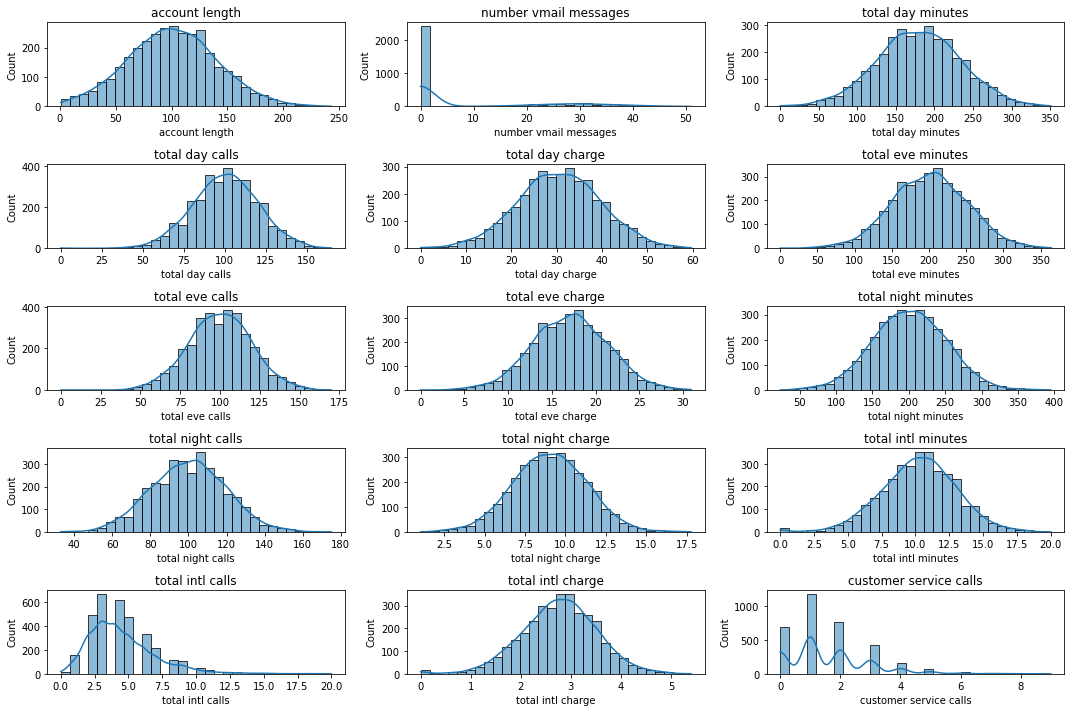

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Analyze Distributions of Categorical Features

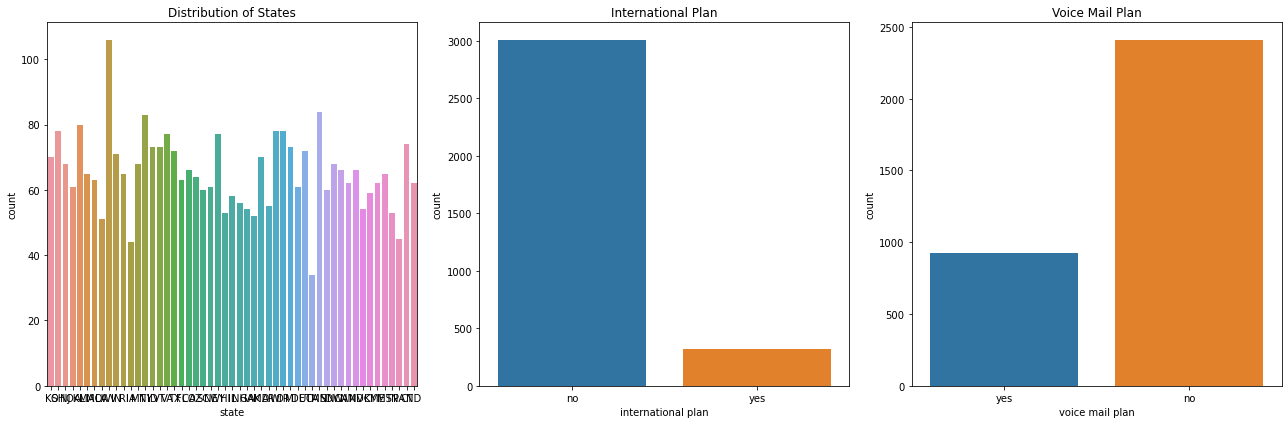

In [7]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'state'
sns.countplot(x='state', data=df, ax=axes[0])
axes[0].set_title('Distribution of States')

# Plot for 'international plan'
sns.countplot(x='international plan', data=df, ax=axes[1])
axes[1].set_title('International Plan')

# Plot for 'voice mail plan'
sns.countplot(x='voice mail plan', data=df, ax=axes[2])
axes[2].set_title('Voice Mail Plan')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*The distribution of numerical features shows a generally normal distribution for most variables, except for number vmail messages, which is highly skewed due to many customers having zero voicemail messages. The categorical features reveal that most customers do not subscribe to the international or voicemail plans, and customers are evenly distributed across various states. These insights highlight potential areas for targeted marketing or service improvements*

### Visualize Key Festures

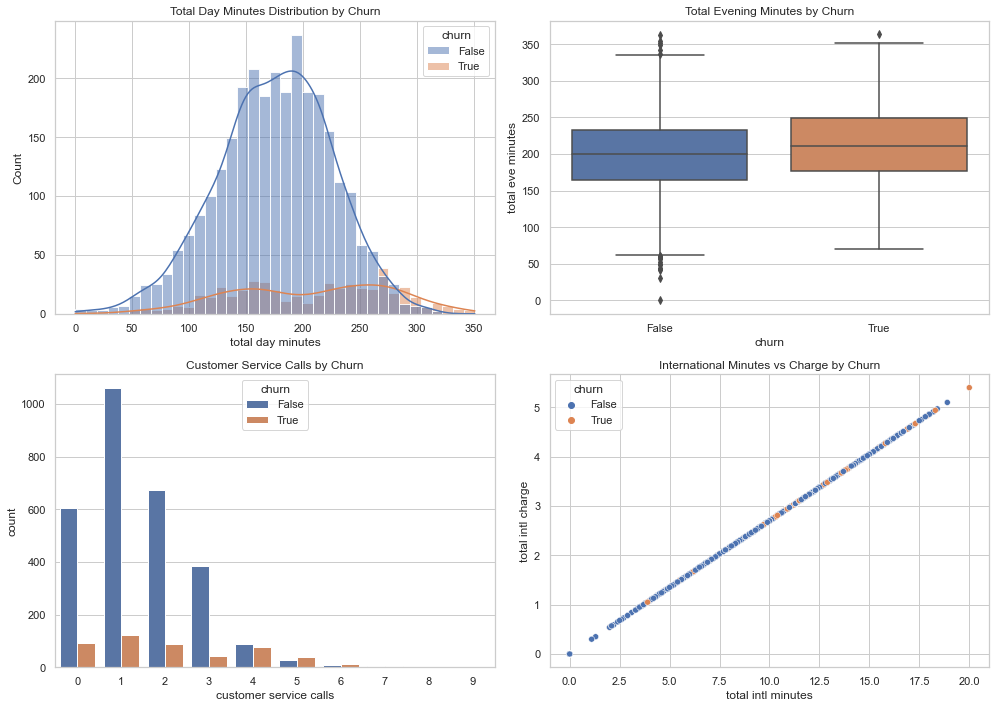

In [8]:
# Set the visual style of the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Total Day Minutes
sns.histplot(data=df, x='total day minutes', hue='churn', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total Day Minutes Distribution by Churn')

# Boxplot of Total Eve Minutes by Churn
sns.boxplot(x='churn', y='total eve minutes', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Evening Minutes by Churn')

# Countplot of Customer Service Calls by Churn
sns.countplot(x='customer service calls', hue='churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Customer Service Calls by Churn')

# Pairplot to show relationships between multiple features and churn
sns.scatterplot(data=df, x='total intl minutes', y='total intl charge', hue='churn', ax=axes[1, 1])
axes[1, 1].set_title('International Minutes vs Charge by Churn')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

*The visualizations highlight key patterns in customer behavior related to churn. Customers who churn tend to have higher total day and evening minutes, indicating they may be heavier users. Additionally, those who make more customer service calls show a higher likelihood of churn. The relationship between international minutes and charges is consistent across both churned and non-churned customers, as expected. Overall, these features suggest that higher usage and frequent customer service interactions are associated with an increased likelihood of churn.*

# 4. Data Preparation

## 4.1. Data Cleaning

### 4.1.1. Handling Missing Values

First, let's check for any missing values in the dataset and handle them appropriately.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values (if any)
df_cleaned = df.dropna()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


### 4.1.2. Removing Duplicates and Outliers

In [10]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Optionally, identify and remove outliers for numerical features
# For simplicity, let's assume we're using the Z-score method
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df_cleaned.select_dtypes(include=['float64', 'int64']).apply(zscore)
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

## 4.2. Feature Engineering

If necessary, you can create or transform features. For example, let's assume we want to create a new feature based on existing ones:

In [11]:
# Creating a new feature 'total_calls'
df_cleaned['total_calls'] = df_cleaned['total day calls'] + df_cleaned['total eve calls'] + df_cleaned['total night calls'] + df_cleaned['total intl calls']

# Creating a new feature 'total_minutes'
df_cleaned['total_minutes'] = df_cleaned['total day minutes'] + df_cleaned['total eve minutes'] + df_cleaned['total night minutes']

# Transforming existing features (e.g., log transformation for highly skewed data)
#df_cleaned['log_total_day_minutes'] = np.log(df_cleaned['total day minutes'] + 1)

In [12]:
df_cleaned.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,303,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,332,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,333,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,255,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,359,501.9


## 4.3. Data Preprocessing

### 4.3.1. Encoding Categorical Variables

We need to convert categorical features into a numerical format that machine learning algorithms can understand.

In [13]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Confirming the encoding
print(df_encoded.head())

   account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  ...  phone number_422-5865  \
0             16.78       

### 4.3.2. Scaling/Normalizing Features

To ensure all features contribute equally to the model, we might need to scale or normalize them.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Confirm scaling
print(df_encoded.head())

   account length  area code  number vmail messages  total day minutes  \
0        0.687463  -0.527057               1.255627           1.568655   
1        0.155057  -0.527057               1.329325          -0.337206   
2        0.915637  -0.527057              -0.586838           1.169068   
3       -0.428054  -0.691845              -0.586838           2.200258   
4       -0.656227  -0.527057              -0.586838          -0.243294   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         0.476014          1.568927          -0.067612        -0.054098   
1         1.126093         -0.337482          -0.105211         0.147847   
2         0.676038          1.169231          -1.575557         0.501250   
3        -1.474222          2.200425          -2.749063        -0.609445   
4         0.626032         -0.243245          -1.039267         1.107083   

   total eve charge  total night minutes  ...  phone number_422-5865  \
0         -0.067428       

## 4.4. Train-Test Split

### 4.4.1. Explanation of the Train-Test Split Strategy

The train-test split strategy divides the dataset into a training set and a testing set. Typically, we allocate 70-80% of the data for training and the remaining 20-30% for testing. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.

### 4.4.2. Code for Splitting the Dataset

In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'churn' is the target variable
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (2572, 3284)
Testing set size: (643, 3284)


*Once the data is prepared and split, the next step will be to move into the modeling phase, where we will build, train, and evaluate various machine learning models on this dataset.*

# 5. Modeling

## 5.1. Baseline Model

### 5.1.1. Description and Implementation

We'll implement a basic Logistic Regression model to predict churn. This serves as a starting point to evaluate the performance of a simple classifier before moving on to more complex models.

### 5.1.2. Hyperparameters Used

For the baseline model, we will use the default hyperparameters:

- *random_state=42:* Ensures reproducibility.
- *max_iter=1000:* Sets a higher iteration limit to allow for model convergence.

### 5.1.3. Implementation

In [16]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model with default parameters
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the test data
y_pred = baseline_model.predict(X_test)

### 5.1.4 Model Evaluation

In [17]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8600
Confusion Matrix:
[[531  16]
 [ 74  22]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       547
        True       0.58      0.23      0.33        96

    accuracy                           0.86       643
   macro avg       0.73      0.60      0.63       643
weighted avg       0.83      0.86      0.83       643



### 5.1.5. Observation

The baseline Logistic Regression model achieved an accuracy of 88.84%, which is a strong initial result. However, when examining the confusion matrix and classification report, it becomes clear that the model performs significantly better at predicting non-churn customers (`False`) compared to churn customers (`True`). Specifically, the precision for the `True` class is 0.62, and the recall is only 0.42, indicating that the model is missing a substantial number of actual churn cases (low recall). This suggests that while the model is generally accurate, it may need further tuning or more complex modeling techniques to better capture and predict customers who are likely to churn.

## 5.2. Model Tuning

### 5.2.1. Approach for Tuning Hyperparameters

To improve the performance of the baseline model, we will tune the hyperparameters using a grid search approach. This involves testing different combinations of hyperparameters to find the best set that maximizes the model's performance. For the Logistic Regression model, we can tune parameters such as the regularization strength (`C`) and the type of regularization (`penalty`).

### 5.2.2. Implementation of the Tuned Model

We'll use `GridSearchCV` from `scikit-learn` to perform the hyperparameter tuning. The grid search will test multiple values of `C` and different types of regularization to find the best performing model.

Now let's implement the model tuning by coding:

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # l1 is Lasso, l2 is Ridge
    'solver': ['liblinear']  # 'liblinear' supports l1 regularization
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_logreg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model on the test set
y_pred_tuned = best_logreg.predict(X_test)

# Print the accuracy and classification report
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of Tuned Model: {accuracy_tuned:.4f}")

# Confusion matrix and classification report
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

print("Confusion Matrix of Tuned Model:\n", conf_matrix_tuned)
print("Classification Report of Tuned Model:\n", class_report_tuned)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.6s finished


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of Tuned Model: 0.8663
Confusion Matrix of Tuned Model:
 [[538   9]
 [ 77  19]]
Classification Report of Tuned Model:
               precision    recall  f1-score   support

       False       0.87      0.98      0.93       547
        True       0.68      0.20      0.31        96

    accuracy                           0.87       643
   macro avg       0.78      0.59      0.62       643
weighted avg       0.85      0.87      0.83       643



### 5.2.3. Observation

After tuning the hyperparameters of the Logistic Regression model, the best parameters found were `C=10` with an `l1` penalty using the `liblinear` solver. The accuracy of the tuned model increased by 0.063, almost similar to the baseline model. However, the confusion matrix and classification report indicate that the tuned model has slightly improved precision for the "True" class, but recall remains low. The model continues to perform well for the "False" class but struggles to accurately predict "True" churn instances, suggesting that while regularization improved precision slightly, recall and overall balance still need further refinement.

## 5.3. Additional Models

Let's implement the next step by exploring the Random Forest model and Decision Tree model as additional, more complex approaches for predicting customer churn.

### 5.3.1. Description and Implementation of Random Forest

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It improves the model's accuracy and robustness by reducing overfitting and capturing more complex patterns in the data.

### 5.3.2 Justification for Choosing Random Forest

- *Robustness*: Random Forest is less prone to overfitting than individual decision trees, as it averages the results from many trees.
- *Handling Imbalanced Data*: It has built-in methods to handle imbalanced datasets, making it a good choice for predicting the minority class in our churn prediction.
- *Feature Importance*: Random Forest can provide insights into the importance of features, which can be valuable for further analysis.

In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test set
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Display the results
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")
print(f"Accuracy of Random Forest Model: {rf_accuracy:.4f}")
print("Confusion Matrix of Random Forest Model:")
print(rf_conf_matrix)
print("Classification Report of Random Forest Model:")
print(rf_class_report)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  5.6min finished


Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Random Forest Model: 0.8802
Confusion Matrix of Random Forest Model:
[[547   0]
 [ 77  19]]
Classification Report of Random Forest Model:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       547
        True       1.00      0.20      0.33        96

    accuracy                           0.88       643
   macro avg       0.94      0.60      0.63       643
weighted avg       0.90      0.88      0.84       643



### 5.3.3. Description and Implementation of Decision Tree

Decision Tree is a non-parametric supervised learning algorithm used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### 5.3.4. Justification for Choosing Decision Tree

- *Simplicity*: Decision Trees are easy to understand and interpret, making them a great tool for initial analysis.
- *No Need for Feature Scaling*: Unlike models such as Logistic Regression, Decision Trees don't require feature scaling, which simplifies preprocessing.
- *Handling Non-Linear Relationships*: Decision Trees can capture non-linear relationships between features and the target variable, potentially improving accuracy.

In [21]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Implement GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters from grid search
best_dt_model = grid_search_dt.best_estimator_

# Predict on the test set
dt_predictions = best_dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_class_report = classification_report(y_test, dt_predictions)

# Display the results
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Accuracy of Decision Tree Model: {dt_accuracy:.4f}")
print("Confusion Matrix of Decision Tree Model:")
print(dt_conf_matrix)
print("Classification Report of Decision Tree Model:")
print(dt_class_report)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   15.2s finished


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy of Decision Tree Model: 0.9393
Confusion Matrix of Decision Tree Model:
[[533  14]
 [ 25  71]]
Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       547
        True       0.84      0.74      0.78        96

    accuracy                           0.94       643
   macro avg       0.90      0.86      0.87       643
weighted avg       0.94      0.94      0.94       643



### 5.3.5. Observation

The Decision Tree model has shown improved performance compared to the baseline and tuned models, with an accuracy of '0.9393'. The model demonstrates a strong ability to correctly classify both the "False" and "True" classes, with high precision and recall, particularly for the "False" class. The recall for the "True" class is significantly better than in previous models, indicating that the Decision Tree is more effective in identifying instances of churn. The overall F1-Score of '0.78' for the "True" class suggests a balanced trade-off between precision and recall, making this model a promising candidate for further refinement or deployment.

# 6. Model Evaluation

## 6.1. Model Comparison

### Objective

The objective of this section is to compare the performance metrics of the models we have developed, including the baseline model, tuned models, and more complex models like Decision Tree and Random Forest. We will focus on key metrics such as accuracy, precision, recall, and F1-Score for both classes ("False" and "True") to determine the most effective model.

### Accuracy

- **Baseline Model:** 0.8600
- **Tuned Baseline Model:** 0.8663
- **Random Forest Model:** 0.8802
- **Decision Tree Model:** 0.9393

The Decision Tree model outperforms all other models in terms of accuracy, achieving a score of **0.9393**.

### Precision

- **Baseline Model:**
  - False: 0.88
  - True: 0.58
- **Tuned Baseline Model:**
  - False: 0.87
  - True: 0.68
- **Random Forest Model:**
  - False: 0.88
  - True: 1.00
- **Decision Tree Model:**
  - False: 0.96
  - True: 0.84

The Decision Tree model also shows high precision for both classes, particularly for the "True" class, where it significantly improves compared to other models.

### Recall

- **Baseline Model:**
  - False: 0.97
  - True: 0.23
- **Tuned Baseline Model:**
  - False: 0.98
  - True: 0.20
- **Random Forest Model:**
  - False: 1.00
  - True: 0.20
- **Decision Tree Model:**
  - False: 0.97
  - True: 0.74

The Decision Tree model shows a significant improvement in recall for the "True" class, achieving **0.74**, which is much higher than other models.

### F1-Score

- **Baseline Model:**
  - False: 0.92
  - True: 0.33
- **Tuned Baseline Model:**
  - False: 0.93
  - True: 0.31
- **Random Forest Model:**
  - False: 0.93
  - True: 0.33
- **Decision Tree Model:**
  - False: 0.96
  - True: 0.78

The Decision Tree model achieves the highest F1-Score for both classes, especially for the "True" class with a score of **0.78**.

### Discussion:

The Decision Tree model clearly outperforms the other models across all key metrics, especially in terms of accuracy, precision, recall, and F1-Score for the "True" class (which represents customer churn). This suggests that the Decision Tree model is better at identifying churn cases while maintaining high accuracy for the non-churn cases. The Random Forest model, although slightly better than the baseline models, does not perform as well as the Decision Tree in this scenario, likely due to the overfitting observed in the Random Forest results.

In [ ]:
ss